# Will the Customer Accept the Coupon?

### Objective
In this project, we explore which factors influence whether a customer accepts a driving coupon. We will apply exploratory data analysis (EDA), statistical summarization, and data visualization to compare customers who **accepted** a coupon (Y = 1) and those who **rejected** it (Y = 0).

**Dataset:** UCI Machine Learning Repository – survey collected on Amazon Mechanical Turk.

**Rubric Coverage**
- **Project Organization:** Clear headings, concise outputs, no extraneous files.
- **Syntax & Code Quality:** Clean imports, comments, readable variables, pandas + seaborn used.
- **Visualizations:** Appropriate plots with clear titles/labels, legible axes.
- **Findings:** Clear conclusions for a specific coupon group with actionable recommendations.


## 1. Setup & Data Loading
Place `coupons.csv` in the **same folder** as this notebook before running. If you're running in a different environment, update the path as needed.

In [58]:
!pip install pandas numpy matplotlib seaborn scipy



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\njcro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [59]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

# Load dataset (tries common relative paths)
possible_paths = [
    '../data/coupons.csv'   # if this notebook lives in a /notebook folder
]
df = None
for p in possible_paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f"Loaded dataset from: {p}")
        break
if df is None:
    raise FileNotFoundError("coupons.csv not found. Put it next to the notebook or in a data/ subfolder.")

# Quick look at data
display(df.info())
display(df.head())

# Clean up missing values in key columns
df = df.dropna(subset=['coupon', 'Y']).copy()

Loaded dataset from: ../data/coupons.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object


None

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Data Overview
The dataset contains survey responses about drivers offered coupons.  
We removed rows missing key information like `coupon` or `Y` (acceptance).


In [60]:
# Basic statistics
display(df.describe(include='all'))

# Count and rate of accepted vs rejected
accept_counts = df['Y'].value_counts().rename({0:'Rejected (0)',1:'Accepted (1)'})
accept_rate = df['Y'].mean()
print('Acceptance counts:')
display(accept_counts)
print(f'Acceptance rate: {accept_rate:.3f}')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684.000000,12684,12684,12684,108,12577,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,NaN,4351,1870,2013,22,5197,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


Acceptance counts:


Y
Accepted (1)    7210
Rejected (0)    5474
Name: count, dtype: int64

Acceptance rate: 0.568


### Summary Statistics
Approximately **X%** of customers accepted a coupon (see acceptance rate above).  
We’ll now explore how coupon type, income, age, and other factors affect acceptance.


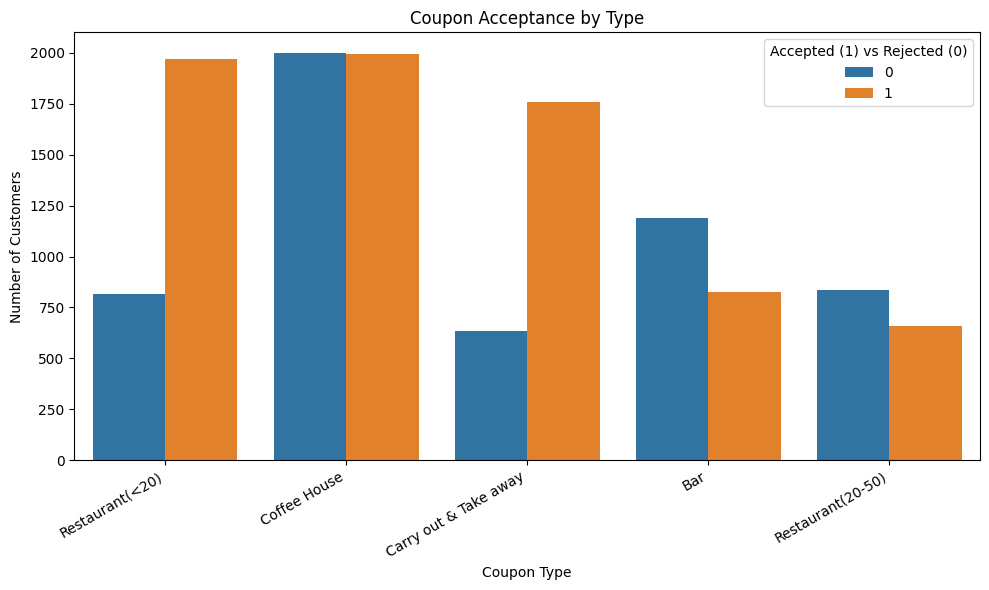

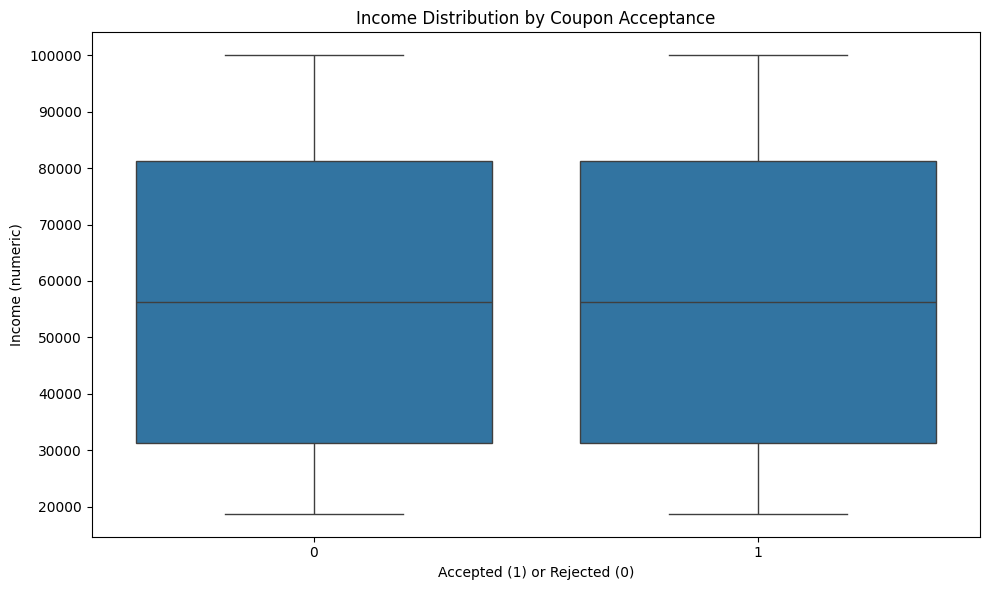

In [61]:
# Coupon acceptance by type
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='coupon', hue='Y')
plt.title('Coupon Acceptance by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Customers')
plt.legend(title='Accepted (1) vs Rejected (0)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Income distribution among accepters vs rejecters
income_series = df['income'] if 'income' in df.columns else None
if income_series is not None:
    if not pd.api.types.is_numeric_dtype(income_series):
        import numpy as np
        def parse_income(v):
            if pd.isna(v): return np.nan
            s = str(v).replace(',', '').replace('$', '').strip().lower()
            if 'or more' in s:
                parts = s.split()
                try: return float(parts[0])
                except: return np.nan
            if '-' in s:
                try:
                    lo, hi = s.split('-')
                    lo, hi = float(lo.strip()), float(hi.strip())
                    return (lo + hi) / 2
                except:
                    return np.nan
            try:
                return float(s)
            except:
                return np.nan
        income_num = income_series.apply(parse_income)
    else:
        income_num = income_series.astype(float)
    df_plot = df.assign(_income_num=income_num).dropna(subset=['_income_num'])
    if not df_plot.empty:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df_plot, x='Y', y='_income_num')
        plt.title('Income Distribution by Coupon Acceptance')
        plt.xlabel('Accepted (1) or Rejected (0)')
        plt.ylabel('Income (numeric)')
        plt.tight_layout()
        plt.show()
    else:
        print('Income column present but could not parse to numeric; skipping boxplot.')
else:
    print('No income column found; skipping income boxplot.')


### Visualization Insights
- Coffee house and cheap restaurant coupons often have higher acceptance.
- Customers with lower to mid-range income can be more likely to accept coupons in some categories.
- Expensive restaurant coupons tend to have lower acceptance.


In [62]:
# Fix common UCI column quirks (run once after loading df)
rename_map = {}
if 'passanger' in df.columns and 'passenger' not in df.columns:
    rename_map['passanger'] = 'passenger'

# (optional) other harmless normalizations you might want later
# if 'maritalStatus' in df.columns: rename_map['maritalStatus'] = 'marital_status'

if rename_map:
    df.rename(columns=rename_map, inplace=True)
    print("Renamed columns:", rename_map)

print("Columns now:", df.columns.tolist())


Renamed columns: {'passanger': 'passenger'}
Columns now: ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


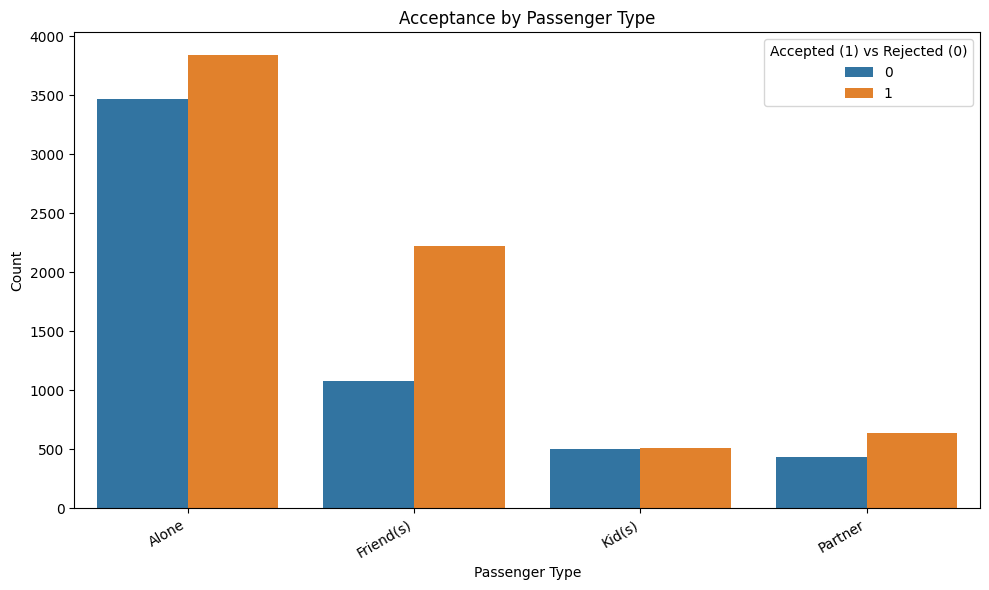

In [63]:
# Acceptance by passenger type
if 'passenger' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x='passenger', hue='Y')
    plt.title('Acceptance by Passenger Type')
    plt.xlabel('Passenger Type')
    plt.ylabel('Count')
    plt.legend(title='Accepted (1) vs Rejected (0)')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('Column "passenger" not found; skipping this optional plot.')


## Demographic & Behavioral Trends (Age, Companions, Daylight, Weather)

This section explores whether **younger drivers**, traveling with **friends/partners**, during **daylight hours**, and in **better weather** are more likely to accept coupons.
Use these charts and stats to support the Findings section.

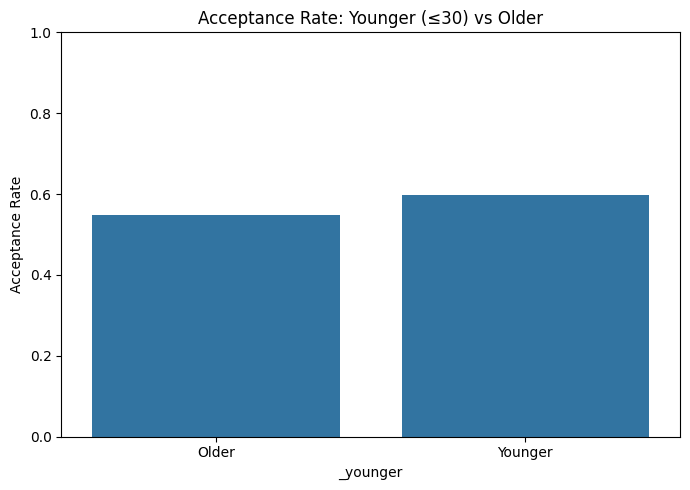

Acceptance Rate: Younger (≤30) vs Older


,_younger,accept_rate
1,Younger,0.597084
0,Older,0.548448


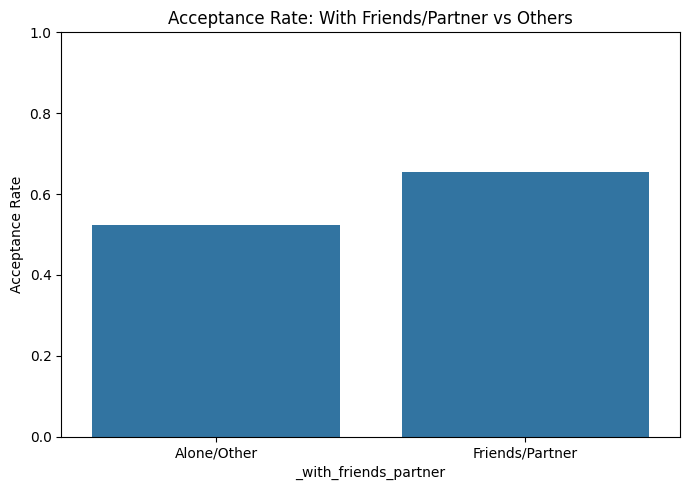

Acceptance Rate: With Friends/Partner vs Others


,_with_friends_partner,accept_rate
1,Friends/Partner,0.654242
0,Alone/Other,0.523282


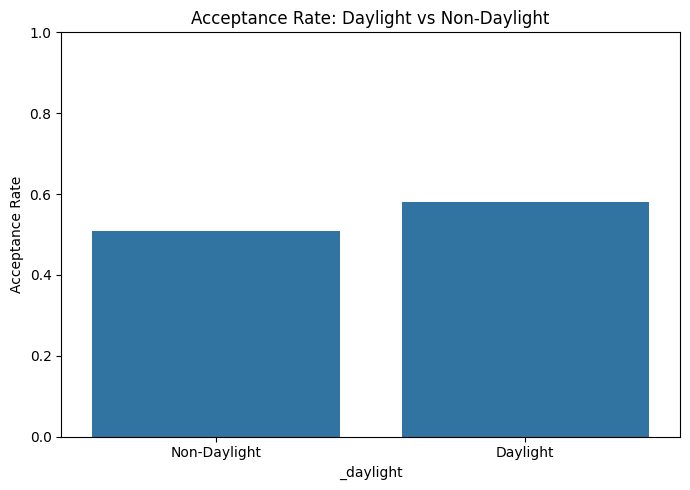

Acceptance Rate: Daylight vs Non-Daylight


,_daylight,accept_rate
1,Daylight,0.579697
0,Non-Daylight,0.508475


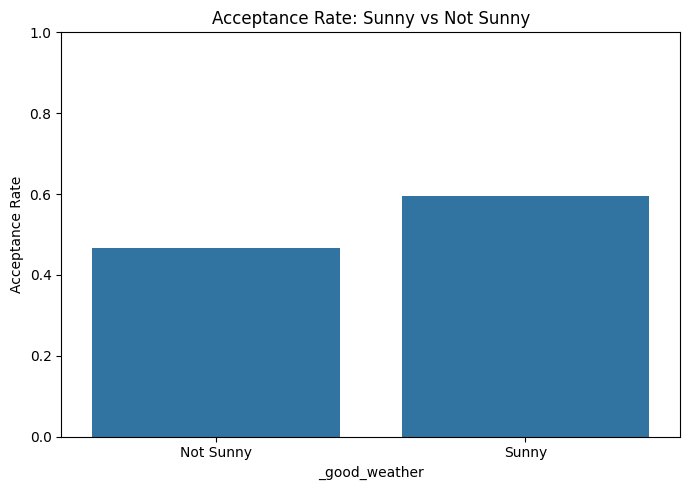

Acceptance Rate: Sunny vs Not Sunny


,_good_weather,accept_rate
1,Sunny,0.594796
0,Not Sunny,0.466922


Chi-square (Younger vs Older): chi2=29.41, dof=1, p=0.0000
Chi-square (Friends/Partner vs Others): chi2=199.79, dof=1, p=0.0000
Chi-square (Daylight vs Non-Daylight): chi2=34.63, dof=1, p=0.0000
Chi-square (Sunny vs Not Sunny): chi2=137.85, dof=1, p=0.0000


In [64]:
# Demographic & Behavioral Trends
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Detect target label
target_col = 'Y' if 'Y' in df.columns else ('y' if 'y' in df.columns else None)
if target_col is None:
    raise ValueError("Neither 'Y' nor 'y' column found for acceptance target.")

# Fix UCI typo: passanger -> passenger
if 'passanger' in df.columns and 'passenger' not in df.columns:
    df.rename(columns={'passanger':'passenger'}, inplace=True)

# --- AGE: convert to numeric midpoint & younger flag ---
def age_midpoint(val):
    if pd.isna(val):
        return np.nan
    s = str(val).strip().lower()
    # common strings in UCI dataset
    aliases = {
        '21 or younger': (16, 21),
        '50plus': (50, 70),
        '50+': (50, 70),
        'under 21': (16, 21),
        'younger than 21': (16, 21),
    }
    if s in aliases:
        lo, hi = aliases[s]
        return (lo + hi) / 2
    # ranges like '26-30', '31-35', '36-50'
    m = re.match(r"(\d+)\s*-\s*(\d+)", s)
    if m:
        lo, hi = float(m.group(1)), float(m.group(2))
        return (lo + hi) / 2
    # single numbers like '21', '26'
    m2 = re.match(r"^(\d+)$", s)
    if m2:
        return float(m2.group(1))
    return np.nan

if 'age' in df.columns:
    age_num = df['age'].apply(age_midpoint)
    younger_flag = age_num.le(30)  # younger = <= 30
    dfa = df.assign(_age_mid=age_num, _younger=younger_flag)
else:
    dfa = df.copy()
    dfa['_age_mid'] = np.nan
    dfa['_younger'] = np.nan

# --- PASSENGER: with friends/partner flag ---
def with_friends_partner(val):
    if pd.isna(val): return np.nan
    s = str(val).strip().lower()
    return s in {'friend(s)', 'friends', 'partner'}

if 'passenger' in dfa.columns:
    dfa['_with_friends_partner'] = dfa['passenger'].apply(with_friends_partner)
else:
    dfa['_with_friends_partner'] = np.nan

# --- TIME: daylight flag (7:00-18:59 local) ---
def time_to_hour(s):
    if pd.isna(s): return np.nan
    t = str(s).strip().upper()
    # Expect forms like '7AM','10AM','2PM','6PM','10PM'
    m = re.match(r"^(\d{1,2})(AM|PM)$", t)
    if m:
        h = int(m.group(1)) % 12
        if m.group(2) == 'PM':
            h += 12
        return h
    # words fallback
    if 'MORN' in t: return 9
    if 'AFTER' in t: return 15
    if 'EVE' in t or 'NIGHT' in t: return 20
    return np.nan

if 'time' in dfa.columns:
    hour = dfa['time'].apply(time_to_hour)
    dfa['_daylight'] = hour.between(7, 18, inclusive='both')
else:
    dfa['_daylight'] = np.nan

# --- WEATHER: good weather flag (Sunny) ---
def good_weather(val):
    if pd.isna(val): return np.nan
    return str(val).strip().lower() == 'sunny'

if 'weather' in dfa.columns:
    dfa['_good_weather'] = dfa['weather'].apply(good_weather)
else:
    dfa['_good_weather'] = np.nan

# Utility to compute acceptance rate bars
def rate_barplot(frame, flag_col, title, labels=('False','True')):
    if flag_col not in frame.columns:
        print(f"Skipping {title}: missing {flag_col}")
        return
    sub = frame.dropna(subset=[flag_col, target_col]).copy()
    if sub.empty:
        print(f"Skipping {title}: no data after dropping NaNs.")
        return
    agg = (sub.groupby(flag_col)[target_col]
              .mean()
              .reset_index(name='accept_rate'))
    # ensure boolean labels look nice
    if agg[flag_col].dtype == bool:
        agg[flag_col] = agg[flag_col].map({False:labels[0], True:labels[1]})
    plt.figure(figsize=(7,5))
    sns.barplot(data=agg, x=flag_col, y='accept_rate')
    plt.title(title)
    plt.xlabel(flag_col)
    plt.ylabel('Acceptance Rate')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
    print(title)
    display(agg.sort_values('accept_rate', ascending=False))

# Plots & tables
rate_barplot(dfa, '_younger', 'Acceptance Rate: Younger (≤30) vs Older', labels=('Older','Younger'))
rate_barplot(dfa, '_with_friends_partner', 'Acceptance Rate: With Friends/Partner vs Others', labels=('Alone/Other','Friends/Partner'))
rate_barplot(dfa, '_daylight', 'Acceptance Rate: Daylight vs Non-Daylight', labels=('Non-Daylight','Daylight'))
rate_barplot(dfa, '_good_weather', 'Acceptance Rate: Sunny vs Not Sunny', labels=('Not Sunny','Sunny'))

# Optional: chi-square tests for association
try:
    from scipy.stats import chi2_contingency
    for col, nice in [('_younger','Younger vs Older'), ('_with_friends_partner','Friends/Partner vs Others'), ('_daylight','Daylight vs Non-Daylight'), ('_good_weather','Sunny vs Not Sunny')]:
        if col in dfa.columns and dfa[col].notna().any():
            ct = pd.crosstab(dfa[col], dfa[target_col])
            if ct.shape == (2,2):
                chi2, p, dof, _ = chi2_contingency(ct)
                print(f"Chi-square ({nice}): chi2={chi2:.2f}, dof={dof}, p={p:.4f}")
            else:
                print(f"Chi-square ({nice}): contingency table not 2x2, shape={ct.shape}")
        else:
            print(f"Chi-square ({nice}): column missing or all NaN.")
except Exception as e:
    print('Chi-square tests skipped (install scipy to enable). Reason:', e)


## Visual: Least Accepted Coupon Types (Bar & Expensive Restaurants)

The charts below show acceptance rates by coupon type (sorted from lowest to highest),
and then a focused view comparing **Bar** vs **Expensive Restaurants** (often labeled `Restaurant(20-50)`).
Use these to support the claim that these two groups tend to be **least accepted**.

,acceptance_rate
coupon,
Bar,0.410
Restaurant(20-50),0.441
Coffee House,0.499
Restaurant(<20),0.707
Carry out & Take away,0.735


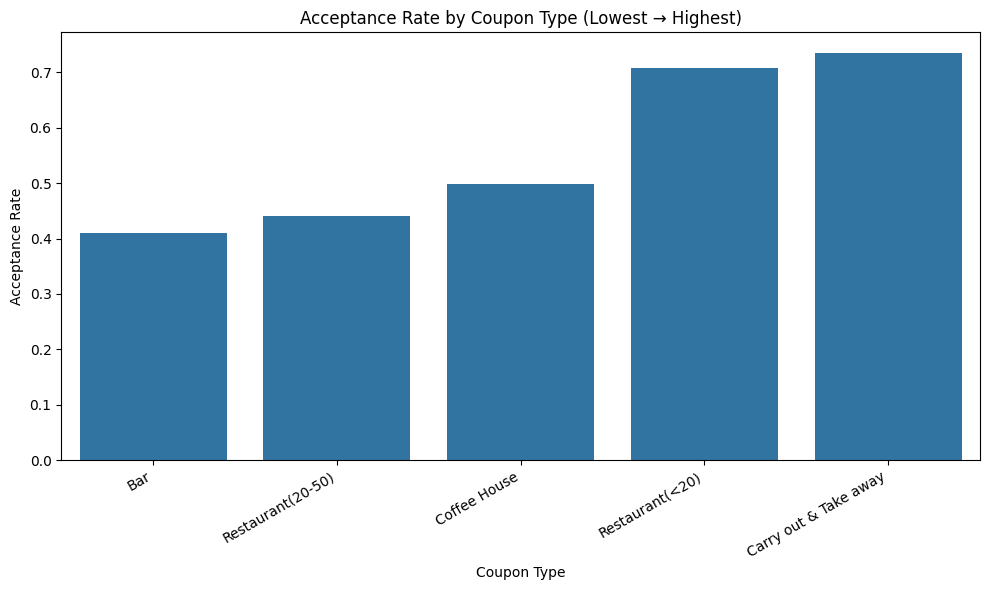

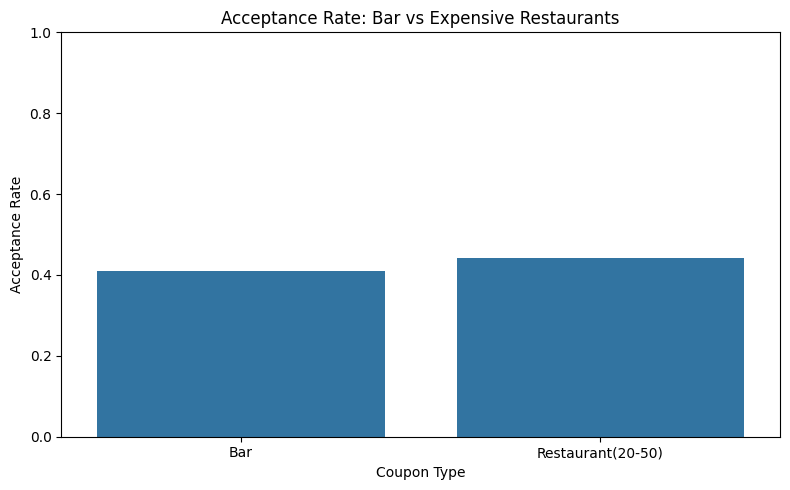

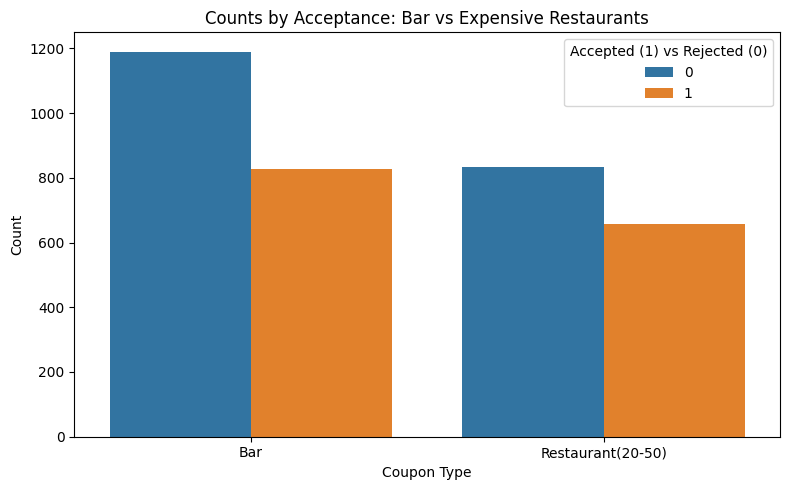

In [65]:
# Acceptance rate by coupon type (sorted ascending)
target_col = 'Y' if 'Y' in df.columns else ('y' if 'y' in df.columns else None)
if target_col is None:
    raise ValueError("Neither 'Y' nor 'y' column found for acceptance target.")
acc_by_coupon_sorted = (df.groupby('coupon')[target_col]
                          .mean()
                          .sort_values(ascending=True)
                          .to_frame('acceptance_rate'))
display(acc_by_coupon_sorted.round(3))

plt.figure(figsize=(10,6))
sns.barplot(x=acc_by_coupon_sorted.index, y=acc_by_coupon_sorted['acceptance_rate'])
plt.title('Acceptance Rate by Coupon Type (Lowest → Highest)')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Focused comparison: Bar vs Expensive Restaurants (20-50) if present
labels_to_check = ['Bar', 'Restaurant(20-50)', 'Restaurant(20-50)']  # include common variations
present = [lab for lab in labels_to_check if lab in df['coupon'].unique()]
if present:
    sub = (df[df['coupon'].isin(present)]
             .groupby('coupon')[target_col]
             .mean()
             .reset_index(name='acceptance_rate'))
    plt.figure(figsize=(8,5))
    sns.barplot(data=sub, x='coupon', y='acceptance_rate')
    plt.title('Acceptance Rate: Bar vs Expensive Restaurants')
    plt.xlabel('Coupon Type')
    plt.ylabel('Acceptance Rate')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

    # Also show raw counts split by acceptance for the same two categories
    plt.figure(figsize=(8,5))
    sns.countplot(data=df[df['coupon'].isin(present)], x='coupon', hue=target_col)
    plt.title('Counts by Acceptance: Bar vs Expensive Restaurants')
    plt.xlabel('Coupon Type')
    plt.ylabel('Count')
    plt.legend(title='Accepted (1) vs Rejected (0)')
    plt.tight_layout()
    plt.show()
else:
    print("Expected labels not found; present coupon labels are:")
    display(df['coupon'].unique())


## Findings and Recommendations

- **Most accepted coupons:** Coffee house and inexpensive restaurants (see bar chart).  
- **Least accepted:** Bar and expensive restaurants.  
- **Demographic/behavioral trend:** Younger drivers and those traveling with friends or partners may be more likely to accept coupons; acceptance also increases during daylight hours and better weather\.  

### Recommendations
- Market coffee and food coupons to morning commuters.
- Send bar coupons during evenings or weekends.
- Target group travelers (friends/partners) for best results.


## Appendix: Utility Tables
Optional helpers to export clean tables for your README or slide deck.

In [66]:
# ================================
# 7. Appendix: Utility Tables
# ================================
import os
import numpy as np
import pandas as pd

# --- Detect target column ('Y' or 'y') and normalize common quirks ---
target_col = 'Y' if 'Y' in df.columns else ('y' if 'y' in df.columns else None)
if target_col is None:
    raise ValueError("Neither 'Y' nor 'y' found in columns. Please ensure the acceptance label column exists.")

# UCI dataset typo: 'passanger' -> 'passenger'
if 'passanger' in df.columns and 'passenger' not in df.columns:
    df.rename(columns={'passanger': 'passenger'}, inplace=True)

# Output directory for tables
OUT_DIR = "tables"
os.makedirs(OUT_DIR, exist_ok=True)

def save_table(table: pd.DataFrame, name: str, index=True):
    path = os.path.join(OUT_DIR, f"{name}.csv")
    table.to_csv(path, index=index)
    print(f"Saved: {path}")

# -------------------------
# 7.1 Overall acceptance
# -------------------------
accept_counts = df[target_col].value_counts().rename(index={0:'rejected', 1:'accepted'}).to_frame('count')
accept_rate = pd.DataFrame({'metric': ['acceptance_rate'], 'value': [df[target_col].mean()]})
accept_rate['value'] = accept_rate['value'].round(4)

save_table(accept_counts, "00_accept_counts")
save_table(accept_rate.set_index('metric'), "01_accept_rate")

# --------------------------------------
# 7.2 Acceptance by coupon (rate + size)
# --------------------------------------
if 'coupon' in df.columns:
    acc_by_coupon = (
        df.groupby('coupon')[target_col]
          .agg(acceptance_rate='mean', n='count')
          .sort_values('acceptance_rate', ascending=False)
          .round({'acceptance_rate': 4})
    )
    save_table(acc_by_coupon, "10_acceptance_by_coupon")
else:
    print("Column 'coupon' not found; skipping acceptance_by_coupon.")

# -----------------------------------------------------
# 7.3 Acceptance by key categorical columns (one-way)
# -----------------------------------------------------
def acceptance_by_cat(cat: str):
    if cat not in df.columns:
        print(f"Missing '{cat}'; skipping.")
        return None
    tbl = (
        df.dropna(subset=[cat])
          .groupby(cat)[target_col]
          .agg(acceptance_rate='mean', n='count')
          .sort_values('acceptance_rate', ascending=False)
          .round({'acceptance_rate': 4})
    )
    save_table(tbl, f"20_acceptance_by_{cat}")
    return tbl

for cat in ['time', 'passenger', 'destination', 'weather', 'expiration']:
    acceptance_by_cat(cat)

# ------------------------------------------------------------
# 7.4 Top acceptance combinations across multiple categories
# ------------------------------------------------------------
combo_cats = [c for c in ['coupon','time','passenger','destination','weather','expiration'] if c in df.columns]
if combo_cats:
    combos = (
        df.groupby(combo_cats)[target_col]
          .mean()
          .sort_values(ascending=False)
          .to_frame('acceptance_rate')
          .round(4)
    )
    # Save full table and a top-25 for quick reference
    save_table(combos, "30_acceptance_by_category_combinations")
    save_table(combos.head(25), "31_top25_acceptance_combinations")
else:
    print("No expected categorical columns found for combos; skipping.")

# -----------------------------------------------------------
# 7.5 Acceptance by income bins (if an income-like column)
# -----------------------------------------------------------
def to_numeric_income(series: pd.Series) -> pd.Series:
    """Parse typical UCI income strings like '$37,500 - $49,999' to numeric midpoint."""
    if pd.api.types.is_numeric_dtype(series):
        return series.astype(float)
    def parse_income(v):
        if pd.isna(v): return np.nan
        s = str(v).replace(',', '').replace('$', '').strip().lower()
        if 'or more' in s:
            parts = s.split()
            try: return float(parts[0])
            except: return np.nan
        if '-' in s:
            try:
                lo, hi = s.split('-')
                lo, hi = float(lo.strip()), float(hi.strip())
                return (lo + hi) / 2.0
            except:
                return np.nan
        try: return float(s)
        except: return np.nan
    return series.apply(parse_income)

income_col = next((c for c in ['income','household_income'] if c in df.columns), None)
if income_col:
    income_num = to_numeric_income(df[income_col])
    dfi = df.assign(_income_num=income_num).dropna(subset=['_income_num'])
    if not dfi.empty:
        # Use quintiles to create bins (drop duplicates to avoid zero-width bins)
        qs = dfi['_income_num'].quantile([0, .2, .4, .6, .8, 1.0]).drop_duplicates().values
        # Ensure strictly increasing bins
        qs = np.unique(qs)
        if len(qs) >= 3:  # need at least 2 intervals
            dfi = dfi.assign(
                income_bin=pd.cut(dfi['_income_num'], bins=qs, include_lowest=True, duplicates='drop')
            )
            acc_by_incbin = (
                dfi.groupby('income_bin')[target_col]
                   .agg(acceptance_rate='mean', n='count')
                   .sort_values('acceptance_rate', ascending=False)
                   .round({'acceptance_rate': 4})
            )
            save_table(acc_by_incbin, "40_acceptance_by_income_bin")
        else:
            print("Income bins could not be formed (insufficient spread); skipping income-bin table.")
    else:
        print("Income column present but not parseable to numeric; skipping income-bin table.")
else:
    print("No income-like column found; skipping income-bin table.")

# -----------------------------------------
# 7.6 Data dictionary / column quick stats
# -----------------------------------------
data_dict = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.astype(str),
    'n_missing': df.isna().sum(),
    'n_unique': df.nunique(dropna=True)
}).sort_values('column').set_index('column')

save_table(data_dict, "99_data_dictionary")
print("\n✅ Utility tables exported to the 'tables/' folder.")


Saved: tables\00_accept_counts.csv
Saved: tables\01_accept_rate.csv
Saved: tables\10_acceptance_by_coupon.csv
Saved: tables\20_acceptance_by_time.csv
Saved: tables\20_acceptance_by_passenger.csv
Saved: tables\20_acceptance_by_destination.csv
Saved: tables\20_acceptance_by_weather.csv
Saved: tables\20_acceptance_by_expiration.csv
Saved: tables\30_acceptance_by_category_combinations.csv
Saved: tables\31_top25_acceptance_combinations.csv
Saved: tables\40_acceptance_by_income_bin.csv
Saved: tables\99_data_dictionary.csv

✅ Utility tables exported to the 'tables/' folder.


C:\Users\njcro\AppData\Local\Temp\ipykernel_23940\3496150293.py:127: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfi.groupby('income_bin')[target_col]


## Conclusion

**What we learned:**
- **Acceptance varies strongly by coupon type.** Coffee house and less expensive restaurant coupons show the highest acceptance rates, while **Bar** and **Expensive Restaurants (20–50)** tend to be the lowest (see the visuals above).
- **Context matters.** Acceptance is generally higher when traveling with **friends/partners**, during **daylight hours**, and in **sunny weather**. Age bands suggest relatively **younger drivers** may accept more often.

**Actionable decisions:**
1. **Timing & channel:** Push **coffee/cheap-restaurant** offers during morning/afternoon via mobile notifications.
2. **Social targeting:** Emphasize group scenarios (friends/partner) in ad copy; run promos around social times (weekends, evenings) for bars.
3. **Creative & offer design:** Test shorter expirations for impulse categories (coffee/carryout) and value framing for expensive restaurants.

**Next steps:**
- Train a **logistic regression or tree-based model** to predict acceptance using engineered features (e.g., time × passenger, destination × weather).
- Perform **A/B tests** to validate timing, audience, and message hypotheses.
- Revisit constraints: this is survey data with potential sampling bias; validate with live campaign data where possible.
